In [ ]:
import pandas as pd
import numpy as np
df_fut = pd.read_csv('futbol.csv')
df_fut.head(5)

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,...,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
0,1,Napoli,it ITA,1,26,22,2,2,60,16,...,68,2.62,46.9,20.0,26.9,1.08,W W W L W,29610,Victor Osimhen - 19,Alex Meret
1,2,Barcelona,es ESP,1,25,21,2,2,47,8,...,65,2.60,48.2,19.6,28.7,1.19,W W L W W,82492,Robert Lewandowski - 15,Marc-André ter Stegen
2,3,Paris S-G,fr FRA,1,27,21,3,3,68,26,...,66,2.44,56.2,30.9,25.3,0.97,L W W W W,42615,Kylian Mbappé - 19,Gianluigi Donnarumma
3,4,Arsenal,eng ENG,1,27,21,3,3,62,25,...,66,2.44,50.3,25.4,24.9,0.96,W W W W W,60196,Martinelli - 12,Aaron Ramsdale
4,5,Manchester City,eng ENG,2,27,19,4,4,67,25,...,61,2.26,54.1,21.3,32.7,1.26,W D W W W,53219,Erling Haaland - 28,Ederson


In [ ]:
!pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 KB 15.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7047 sha256=bee2b449b11f89393de214e4920c1d688e64e0e5d6a7babece7eb8175130d9ce
  Stored in directory: /root/.cache/pip/wheels/04/bb/0d/2d02ec45f29c48d6192476bfb59c5a0e64b605e7212374dd15
Successfully built littleutils


# La liga italiana ha tenido fama de defensiva, creo que se meten menos de dos goles de media por partido.

In [ ]:
df_fut['Promedio'] = df_fut['GF'] / df_fut['MP'] 
df_fut.head()

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,...,Pts/MP,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper,Promedio
0,1,Napoli,it ITA,1,26,22,2,2,60,16,...,2.62,46.9,20.0,26.9,1.08,W W W L W,29610,Victor Osimhen - 19,Alex Meret,2.307692
1,2,Barcelona,es ESP,1,25,21,2,2,47,8,...,2.60,48.2,19.6,28.7,1.19,W W L W W,82492,Robert Lewandowski - 15,Marc-André ter Stegen,1.880000
2,3,Paris S-G,fr FRA,1,27,21,3,3,68,26,...,2.44,56.2,30.9,25.3,0.97,L W W W W,42615,Kylian Mbappé - 19,Gianluigi Donnarumma,2.518519
3,4,Arsenal,eng ENG,1,27,21,3,3,62,25,...,2.44,50.3,25.4,24.9,0.96,W W W W W,60196,Martinelli - 12,Aaron Ramsdale,2.296296
4,5,Manchester City,eng ENG,2,27,19,4,4,67,25,...,2.26,54.1,21.3,32.7,1.26,W D W W W,53219,Erling Haaland - 28,Ederson,2.481481


In [ ]:
df_ita = df_fut[df_fut['Country'] == 'it ITA']
print('El promedio de italia es de',df_ita['Promedio'].mean())

El promedio de italia es de 1.263076923076923


# ¿Se meten menos goles en Italia que en España?

In [ ]:
df_esp = df_fut[df_fut['Country'] == 'es ESP']
print('El promedio de italia es de',df_ita['Promedio'].mean())
print('El promedio de españa es de',df_esp['Promedio'].mean())

if(df_esp['Promedio'].mean() < df_ita['Promedio'].mean()):
  print('Se meten menos goles en españa que en italia')
else:
  print('Se meten menos goles en italia que en españa')

El promedio de italia es de 1.263076923076923
El promedio de españa es de 1.2123333333333335
Se meten menos goles en españa que en italia


In [ ]:
from pingouin import ttest
test_result_itaEsp = ttest(x=df_esp['Promedio'], y=df_ita['Promedio'], alternative='greater')
test_result_itaEsp

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.415039,38,greater,0.659776,"[-0.26, inf]",0.131247,0.662,0.020056


**Resultado:** Como la p-value es mucho mayor a 0.05 no rechazamos la hipotesis nula, eso implica que no hay diferencias significativas entre la media de goles entre España e Italia

# ¿Hay diferencia de goles entre ligas?, ¿en que liga se meten más goles?.

In [ ]:
mean_by_league = df_fut.groupby('Country')['Promedio'].mean()
mean_by_league

Country
de GER     1.585648
eng ENG    1.348747
es ESP     1.212333
fr FRA     1.416667
it ITA     1.263077
Name: Promedio, dtype: float64

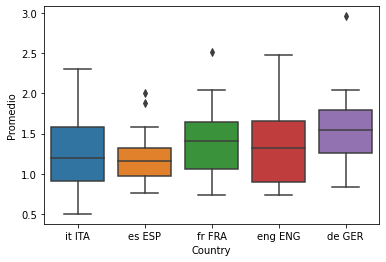

In [ ]:
# Visualizar
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df_fut, y='Promedio', x='Country')
plt.show()

In [ ]:
from pingouin import anova

# Test anova
anova_results = anova(data=df_fut, dv='Promedio', between='Country')
anova_results

,Source,ddof1,ddof2,F,p-unc,np2
0,Country,4,93,2.008729,0.099642,0.079526


**Resultado 1**: El p-value al ser mayor a 0.05 no se rechaza la hipotesis nula, eso significa que no hay diferencias significativas entre los goles marcados entre las 5 grandes ligas

<AxesSubplot:xlabel='Country', ylabel='Promedio'>

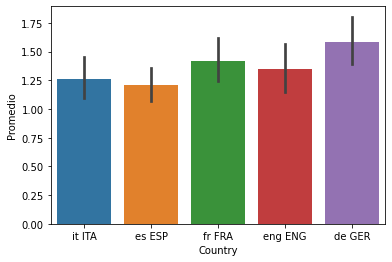

In [ ]:
sns.barplot(data=df_fut, y='Promedio', x='Country')

In [ ]:
from pingouin import pairwise_tests

pair_results = pairwise_tests(data=df_fut, dv='Promedio', between='Country', alternative='greater')
pair_results

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,Country,de GER,eng ENG,False,True,1.463037,35.984001,greater,0.076069,1.451,0.463175
1,Country,de GER,es ESP,False,True,2.739941,30.604758,greater,0.005079,10.379,0.886599
2,Country,de GER,fr FRA,False,True,1.116454,35.092120,greater,0.135907,1.028,0.356133
3,Country,de GER,it ITA,False,True,2.189806,34.301345,greater,0.017717,3.922,0.700875
4,Country,eng ENG,es ESP,False,True,0.977670,38.000000,greater,0.167210,0.902,0.303024
5,Country,eng ENG,fr FRA,False,True,-0.440136,38.000000,greater,0.668834,0.667,-0.136418
6,Country,eng ENG,it ITA,False,True,0.569824,38.000000,greater,0.286075,0.703,0.176614
7,Country,es ESP,fr FRA,False,True,-1.607504,38.000000,greater,0.941889,0.589,-0.498238
8,Country,es ESP,it ITA,False,True,-0.415039,38.000000,greater,0.659776,0.662,-0.128639
9,Country,fr FRA,it ITA,False,True,1.105773,38.000000,greater,0.137888,1.002,0.342729


**Resultado 2**: La liga alemana es la que mayor promedio de goles tiene.

In [ ]:
df_ger = df_fut[df_fut['Country'] == 'de GER']

test_result_espGer = ttest(x=df_ger['Promedio'], y=df_esp['Promedio'], alternative='greater')
test_result_espGer

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.739941,30.604758,greater,0.005079,"[0.14, inf]",0.905598,10.379,0.862038


**Resultado 3 (Extra):** En el caso de Alemania y España, rechazamos la hipotesis nula. Ya que el p-value es menor a 0.05.

# ¿Se están metiendo menos goles en general en las 5 grandes ligas respecto el año pasado?

In [ ]:
df_fut_old = pd.read_csv('futbol_2122.csv')
df_fut_old.head()

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Attendance,Top Team Scorer,Goalkeeper
0,1,Manchester City,eng ENG,1,38,29,6,3,99,26,73,93,2.45,88.7,24.6,64.0,1.68,52774,Kevin De Bruyne - 15,Ederson
1,2,Liverpool,eng ENG,2,38,28,8,2,94,26,68,92,2.42,88.7,33.8,54.9,1.45,53352,Mohamed Salah - 23,Alisson
2,3,Bayern Munich,de GER,1,34,24,5,5,97,37,60,77,2.26,89.0,36.3,52.7,1.55,33176,Robert Lewandowski - 35,Manuel Neuer
3,4,Paris S-G,fr FRA,1,38,26,8,4,90,36,54,86,2.26,76.7,39.8,36.9,0.97,41589,Kylian Mbappé - 28,Keylor Navas
4,5,Real Madrid,es ESP,1,38,26,8,4,80,31,49,86,2.26,71.7,43.9,27.8,0.73,41235,Karim Benzema - 27,Thibaut Courtois


In [ ]:
df_fut_old['Promedio'] = df_fut_old['GF'] / df_fut_old['MP'] 
df_fut_old.head()

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,...,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Attendance,Top Team Scorer,Goalkeeper,Promedio
0,1,Manchester City,eng ENG,1,38,29,6,3,99,26,...,93,2.45,88.7,24.6,64.0,1.68,52774,Kevin De Bruyne - 15,Ederson,2.605263
1,2,Liverpool,eng ENG,2,38,28,8,2,94,26,...,92,2.42,88.7,33.8,54.9,1.45,53352,Mohamed Salah - 23,Alisson,2.473684
2,3,Bayern Munich,de GER,1,34,24,5,5,97,37,...,77,2.26,89.0,36.3,52.7,1.55,33176,Robert Lewandowski - 35,Manuel Neuer,2.852941
3,4,Paris S-G,fr FRA,1,38,26,8,4,90,36,...,86,2.26,76.7,39.8,36.9,0.97,41589,Kylian Mbappé - 28,Keylor Navas,2.368421
4,5,Real Madrid,es ESP,1,38,26,8,4,80,31,...,86,2.26,71.7,43.9,27.8,0.73,41235,Karim Benzema - 27,Thibaut Courtois,2.105263


In [ ]:
print(df_fut_old['Promedio'].mean())
print(df_fut['Promedio'].mean())

1.4082264484741263
1.3607974300831442


In [ ]:
# Diferenciamos las temporadas
df_fut['Temporada'] = '22-23'
df_fut_old['Temporada'] = '21-22'

In [ ]:
# Concatenamos los dataframes
df_fut_all = pd.concat([df_fut, df_fut_old], axis=0)

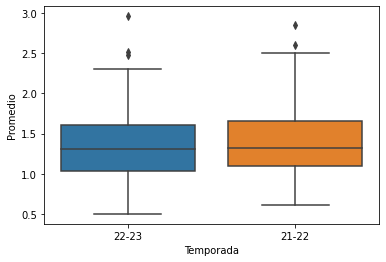

In [ ]:
sns.boxplot(data=df_fut_all, y='Promedio', x='Temporada')
plt.show()

In [ ]:
test_result_all = ttest(x=df_fut['Promedio'], y=df_fut_old['Promedio'], alternative='greater')
test_result_all

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.727938,194,greater,0.766235,"[-0.16, inf]",0.103991,0.398,0.008888


**Resultado:** El p-value al ser mayor a 0.05 no se rechaza la hipotesis nula, eso significa que no hay diferencias significativas entre los goles marcados entre la temporada actual y la anterior